In [ ]:
%pip install pflacco
%pip install cma
%pip install ioh

### First approach

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from ioh import ProblemClass, get_problem
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


from pflacco.sampling import create_initial_sample

from pflacco.classical_ela_features import calculate_ela_distribution
from pflacco.misc_features import calculate_fitness_distance_correlation
from pflacco.local_optima_network_features import compute_local_optima_network, calculate_lon_features

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pflacco.sampling import create_initial_sample
from pflacco.classical_ela_features import calculate_ela_distribution
from pflacco.misc_features import calculate_fitness_distance_correlation
import cma
from pflacco.classical_ela_features import (

    calculate_dispersion,

    calculate_ela_distribution,

    calculate_ela_level,

    calculate_ela_meta,

    calculate_information_content,

    calculate_nbc,

)

from pflacco.sampling import create_initial_sample


In [ ]:

def objective_function(x):
    return x[0]**2 - x[1]**2

dim = 2

X = create_initial_sample(dim, sample_type = 'lhs')
y = X.apply(lambda x: objective_function(x), axis = 1)

ela_distr = calculate_ela_distribution(X, y)
print(ela_distr)

fdc = calculate_fitness_distance_correlation(X, y)
print(fdc)

{'ela_distr.skewness': 0.21182703751842416, 'ela_distr.kurtosis': -0.3272922577075046, 'ela_distr.number_of_peaks': 1, 'ela_distr.costs_runtime': 0.0}
{'fitness_distance.fd_correlation': 0.5502651168011565, 'fitness_distance.fd_cov': 0.004176744285233817, 'fitness_distance.distance_mean': 0.13739614875998457, 'fitness_distance.distance_std': 0.0856344402944876, 'fitness_distance.fitness_mean': -0.6778340115504412, 'fitness_distance.fitness_std': 0.08863748834434348, 'fitness_distance.costs_runtime': 0.0}


In [ ]:
bbob_functions = {
    1: cma.bbobbenchmarks.F1,
    2: cma.bbobbenchmarks.F2,
    3: cma.bbobbenchmarks.F3,
    4: cma.bbobbenchmarks.F4,
    5: cma.bbobbenchmarks.F5,
}

dim = 2
samples = 100
num_of_samples = 1000

ela_data = []

for func_id, func_class in bbob_functions.items():
  for x in range(0,num_of_samples):
      func = func_class()

      x_samples = np.random.uniform(-5, 5, (samples, dim))
      y_samples = np.array([func(x) for x in x_samples])

      ela_distr = calculate_ela_distribution(x_samples, y_samples)
      ela_fdc = calculate_fitness_distance_correlation(x_samples, y_samples)
      ela_df_distr = pd.DataFrame([ela_distr])
      ela_df_fdc = pd.DataFrame([ela_fdc])
      ela_df = pd.concat([ela_df_distr, ela_df_fdc], axis=1, join='inner')
      ela_df['Function'] = f'F{func_id}'
      ela_data.append(ela_df)

In [ ]:
ela_data_df = pd.concat(ela_data, ignore_index=True)

selected_features_1 = ['ela_distr.skewness', 'ela_distr.kurtosis', 'ela_distr.number_of_peaks', 'ela_distr.costs_runtime', 'fitness_distance.fd_correlation','fitness_distance.fd_cov',	'fitness_distance.distance_mean',	'fitness_distance.distance_std',	'fitness_distance.fitness_mean',	'fitness_distance.fitness_std',	'fitness_distance.costs_runtime']
selected_features_2 = ['ela_distr.skewness', 'ela_distr.kurtosis', 'ela_distr.number_of_peaks', 'ela_distr.costs_runtime']
selected_features_3 = ['fitness_distance.fd_correlation','fitness_distance.fd_cov',	'fitness_distance.distance_mean',	'fitness_distance.distance_std',	'fitness_distance.fitness_mean',	'fitness_distance.fitness_std',	'fitness_distance.costs_runtime']

ela_melted_1 = ela_data_df.melt(id_vars='Function', value_vars=selected_features_1,
                               var_name='ELA Feature', value_name='Value')
ela_melted_2 = ela_data_df.melt(id_vars='Function', value_vars=selected_features_2,
                               var_name='ELA Feature', value_name='Value')
ela_melted_3 = ela_data_df.melt(id_vars='Function', value_vars=selected_features_3,
                               var_name='ELA Feature', value_name='Value')

In [ ]:

selected_features_1 = ['ela_distr.skewness', 'ela_distr.kurtosis', 'ela_distr.number_of_peaks', 'ela_distr.costs_runtime', 'fitness_distance.fd_correlation','fitness_distance.fd_cov',	'fitness_distance.distance_mean',	'fitness_distance.distance_std',	'fitness_distance.fitness_mean',	'fitness_distance.fitness_std',	'fitness_distance.costs_runtime']
selected_features_2 = ['ela_distr.skewness', 'ela_distr.kurtosis', 'ela_distr.number_of_peaks', 'ela_distr.costs_runtime']
selected_features_3 = ['fitness_distance.fd_correlation','fitness_distance.fd_cov',	'fitness_distance.distance_mean',	'fitness_distance.distance_std',	'fitness_distance.fitness_mean',	'fitness_distance.fitness_std',	'fitness_distance.costs_runtime']

ela_melted_1 = ela_data_df.melt(id_vars='Function', value_vars=selected_features_1,
                               var_name='ELA Feature', value_name='Value')
ela_melted_2 = ela_data_df.melt(id_vars='Function', value_vars=selected_features_2,
                               var_name='ELA Feature', value_name='Value')
ela_melted_3 = ela_data_df.melt(id_vars='Function', value_vars=selected_features_3,
                               var_name='ELA Feature', value_name='Value')

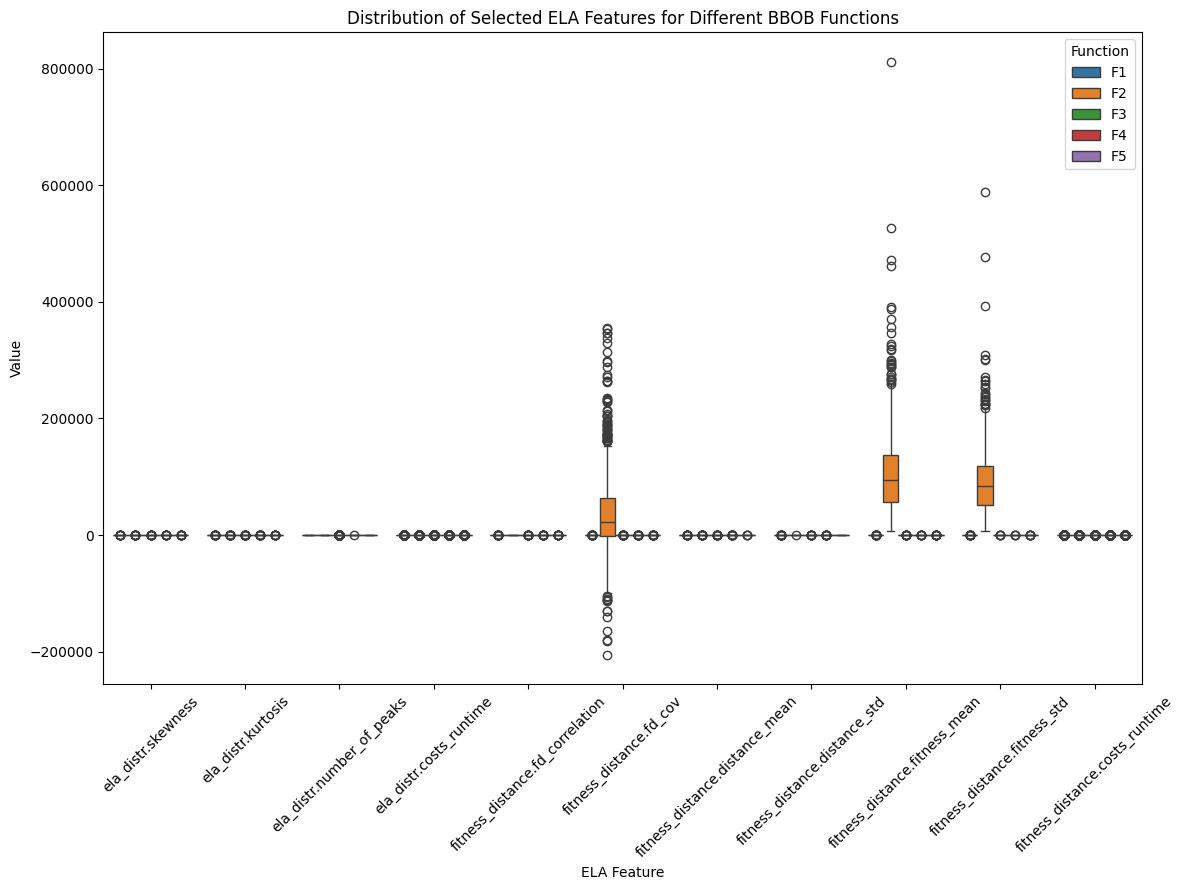

In [36]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=ela_melted_1, x='ELA Feature', y='Value', hue='Function')
plt.title("Distribution of Selected ELA Features for Different BBOB Functions")
plt.xticks(rotation=45)
plt.legend(title='Function')
plt.tight_layout()
plt.show()

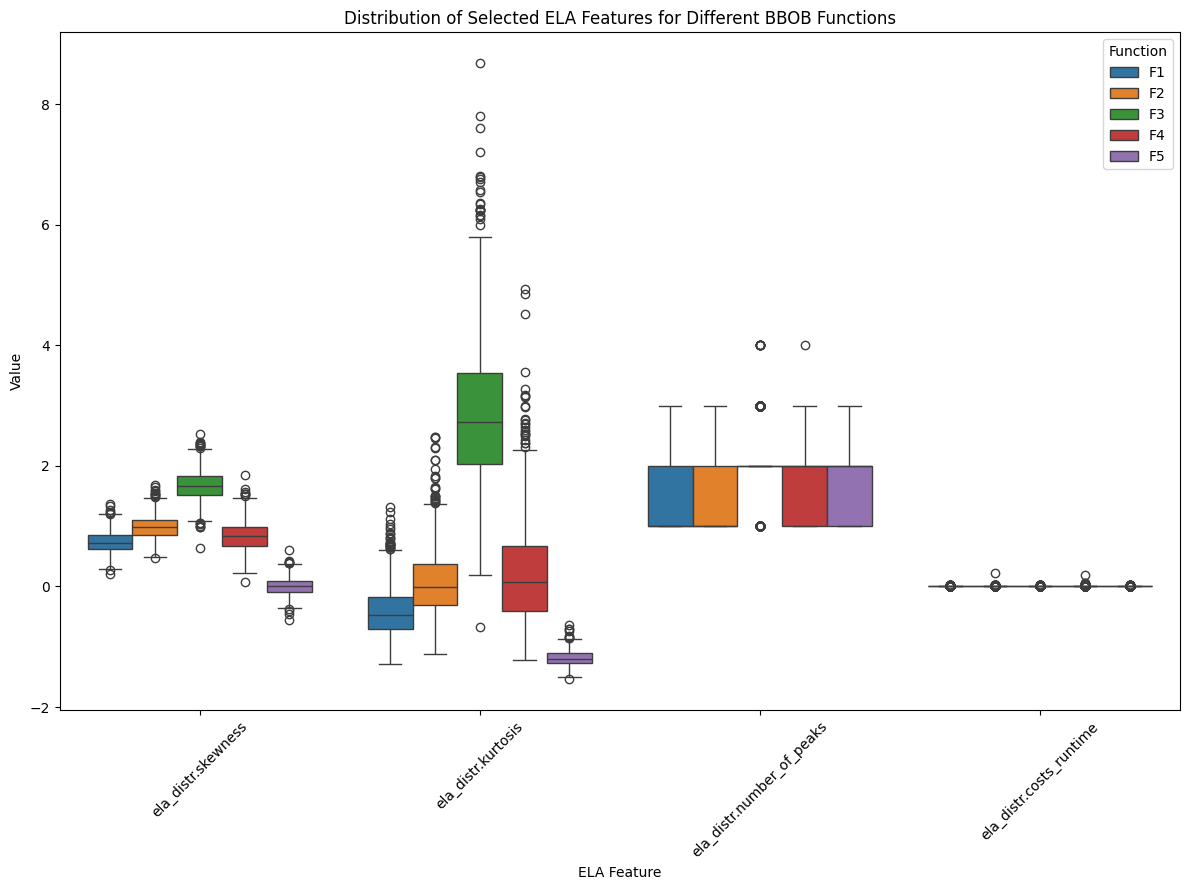

In [37]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=ela_melted_2, x='ELA Feature', y='Value', hue='Function')
plt.title("Distribution of Selected ELA Features for Different BBOB Functions")
plt.xticks(rotation=45)
plt.legend(title='Function')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=ela_melted_3, x='ELA Feature', y='Value', hue='Function')
plt.title("Distribution of Selected ELA Features for Different BBOB Functions")
plt.xticks(rotation=45)
plt.legend(title='Function')
plt.tight_layout()
plt.show()

In [ ]:
for feature in selected_features_1:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=ela_data_df, x='Function', y=feature)
    plt.title(f"Distribution of {feature} for Different BBOB Functions")
    plt.xlabel("BBOB Function")
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
sns.pairplot(ela_data_df, hue="Function", vars=selected_features_1, palette="Set2")
plt.suptitle("Pair Plot of Selected ELA Features", y=1.02)
plt.show()


### Second approach

In [ ]:
samples = 100  
num_of_samples = 10  
ela_data = []  

lower_bound = -5
upper_bound = 5

fid_list = range(1, 25 + 1)  
iid_list = range(1, 16 + 1)  

for dim in range(2, 8):
    for func_id in range(1, 25):
        for iid in iid_list:
            
            problem = get_problem(func_id, iid, dim, ProblemClass.BBOB)
            

            for _ in range(num_of_samples):
                X = create_initial_sample(dim, lower_bound=-5, upper_bound=5)

                y = X.apply(lambda x: problem(x), axis=1)

                ela_distr = calculate_ela_distribution(X, y)
                ela_df_distr = pd.DataFrame([ela_distr])

                ela_fdc = calculate_fitness_distance_correlation(X, y)
                ela_df_fdc = pd.DataFrame([ela_fdc])

                ela_meta = calculate_ela_meta(X, y)
                ela_df_meta = pd.DataFrame([ela_meta])

                ela_level = calculate_ela_level(X, y)
                ela_df_level = pd.DataFrame([ela_level])

                nbc = calculate_nbc(X, y)
                ela_df_nbc = pd.DataFrame([nbc])

                disp = calculate_dispersion(X, y)
                ela_df_disp = pd.DataFrame([disp])

                ic = calculate_information_content(X, y, seed=100)
                ela_df_ic = pd.DataFrame([ic])

                ela_df = pd.concat([ela_df_distr, ela_df_fdc, ela_df_meta, ela_df_level, ela_df_nbc, ela_df_disp, ela_df_ic], axis=1, join='inner')
                ela_df['Function'] = f'F{func_id}'
                ela_df['Instance'] = iid
                ela_df['Dimension'] = dim
                ela_data.append(ela_df)

final_ela_data = pd.concat(ela_data, axis=0, ignore_index=True)

final_ela_data.to_csv("ela_results.csv", index=False)

KeyboardInterrupt: 

In [28]:
final_ela_data = pd.read_csv("ela_final_results.csv")

In [29]:
final_ela_data.head()

,ela_distr.skewness,ela_distr.kurtosis,ela_distr.number_of_peaks,ela_distr.costs_runtime,fitness_distance.fd_correlation,fitness_distance.fd_cov,fitness_distance.distance_mean,fitness_distance.distance_std,fitness_distance.fitness_mean,fitness_distance.fitness_std,...,disp.costs_runtime,ic.h_max,ic.eps_s,ic.eps_max,ic.eps_ratio,ic.m0,ic.costs_runtime,Function,Instance,Dimension
0,0.308304,-0.857005,2,0.016,0.835722,0.569806,1.075864,0.626929,80.878534,1.087545,...,0.015,0.723599,1.086086,1.885344,0.705706,0.367347,0.110,F1,1,2
1,0.308304,-0.857005,2,0.000,0.835722,0.569806,1.075864,0.626929,80.878534,1.087545,...,0.000,0.723599,1.086086,1.885344,0.705706,0.367347,0.094,F1,1,2
2,0.308304,-0.857005,2,0.000,0.835722,0.569806,1.075864,0.626929,80.878534,1.087545,...,0.000,0.723599,1.086086,1.885344,0.705706,0.367347,0.093,F1,1,2
3,0.308304,-0.857005,2,0.000,0.835722,0.569806,1.075864,0.626929,80.878534,1.087545,...,0.000,0.723599,1.086086,1.885344,0.705706,0.367347,0.093,F1,1,2
4,0.308304,-0.857005,2,0.000,0.835722,0.569806,1.075864,0.626929,80.878534,1.087545,...,0.000,0.723599,1.086086,1.885344,0.705706,0.367347,0.110,F1,1,2


In [30]:
list_of_dimensions = []

for x in range(2,8):
    df = final_ela_data[final_ela_data["Dimension"] == x]
    list_of_dimensions.append(df)

### Classification

In [31]:
df = list_of_dimensions[0]
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)]
X = df.drop(columns = ['Function','Dimension','Instance'], axis=1)
y = df['Function']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')


In [32]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 1.0


In [29]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 1.0


In [ ]:
# svm_classifier = SVC(kernel='linear', random_state=42)
# svm_classifier.fit(X_train, y_train)

# y_pred_svm = svm_classifier.predict(X_test)

# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# print(f"SVM Accuracy: {accuracy_svm}")

### Classification with PCA

In [33]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy without PCA: {accuracy_pca}")

Random Forest Accuracy without PCA: 0.9798387096774194


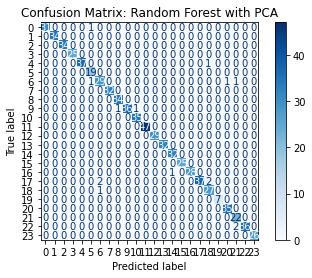

In [36]:
cm = confusion_matrix(y_test, y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Random Forest with PCA")
plt.show()

In [15]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.989247311827957


In [9]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.9865591397849462


In [10]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.9744623655913979


In [11]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.9650537634408602


In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.8548387096774194


In [13]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = rf_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_pca}")

Random Forest Accuracy with PCA: 0.5994623655913979


In [20]:
list_of_acc = []

for x in range(2,20):
    pca = PCA(n_components=x)
    X_pca = pca.fit_transform(X_scaled)

    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier_pca.fit(X_train_pca, y_train)

    y_pred_pca = rf_classifier_pca.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    print(accuracy_pca)
    list_of_acc.append(accuracy_pca)


0.8548387096774194
0.9596774193548387
0.9758064516129032
0.9852150537634409
0.9838709677419355
0.9838709677419355
0.9838709677419355
0.9811827956989247
0.9879032258064516
0.9811827956989247
0.9838709677419355
0.9838709677419355
0.9798387096774194
0.9771505376344086
0.9852150537634409
0.9865591397849462
0.9852150537634409
0.9838709677419355


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


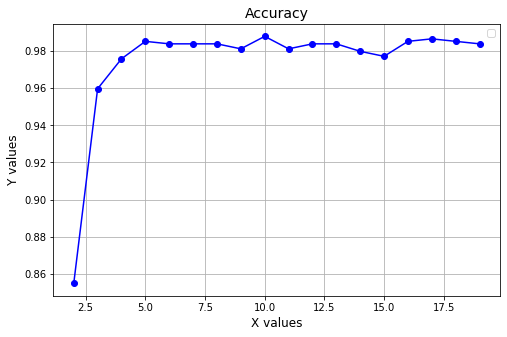

In [22]:
import matplotlib.pyplot as plt

x = list(range(2, 20))

plt.figure(figsize=(8, 5))
plt.plot(x, list_of_acc, marker='o', linestyle='-', color='b')

# Add labels, title, and legend
plt.title("Accuracy", fontsize=14)
plt.xlabel("X values", fontsize=12)
plt.ylabel("Y values", fontsize=12)
plt.legend()
plt.grid(True)